<h1 style="color:purple; background:pink; line-height:2; text-align:center;">E-Commerce Transaction Data Analysis</h1>

### About Dataset
- This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Column Info
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

### Import basic required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Load and read the E-Commerce dataset

**Dataset link- https://drive.google.com/file/d/1GmLMpW5Bi4MX4r9JBtL5-g02NKtgQQGz/view?usp=sharing** 

In [2]:
df=pd.read_csv('dataset/E-Commerce Dataset.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Understanding the data

In [3]:
df.shape

(541909, 8)

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Duplicate rows

In [7]:
df.duplicated().sum()

5268

**Drop duplicate rows.**

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Missing values

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

#### We are not going to build any machine learning models so let the missing values remain in the dataset

### Descriptive Datastics
#### 1. Quantitative Columns

In [10]:
df[['Quantity','UnitPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,536641.0,9.620029,219.130156,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,536641.0,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0


#### 2. Categorical Columns

In [11]:
df.describe(include=object).T

,count,unique,top,freq
InvoiceNo,536641,25900,573585,1114
StockCode,536641,4070,85123A,2301
Description,535187,4223,WHITE HANGING HEART T-LIGHT HOLDER,2357
InvoiceDate,536641,23260,2011-10-31 14:41:00,1114
Country,536641,38,United Kingdom,490300


### Insights:
1. **Average quantity per order is 9.**
2. **Minimum quantity shopped is -80995 and this is strange because quantity cannot be negative.**
3. **Maximum Quantity shopped is 80995.**
4. **Average Unit price is 4.63 Dollar and minimum unit price is -11061 Dollar and this is also something odd in the UnitPrice column.**
5. **Maximum Unit price is 38970 Dollar.**
6. **Out of total 536641 Entries, 25900 are unique Invoice Numbers.**
7. **Total 4070 Unique stock codes.**
8. **23260 Unique Invoice Dates.**
9. **38 Different country.**

### Exploratory Data Analysis

### 1. Unique Values in each column

In [12]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### 2. How many orders where canceled?

In [13]:
canceled_orders=df[(df['InvoiceNo'].str.startswith('C')) & (df['Quantity']<0)]
canceled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [14]:
print(f"{len(canceled_orders)} orders are cancelled.")

9251 orders are cancelled.


### 3. Count the orders where Quantity is less than zero? And replace it by 0.

In [15]:
zero_quantity=df[df['Quantity']<=0]
print(f"{len(zero_quantity)} Orders with quantity less than zero")

10587 Orders with quantity less than zero


In [16]:
df['Quantity']=df['Quantity'].apply(lambda x :x if x>0 else 0)
zero_quantity=df[df['Quantity']<0]
print(f"{len(zero_quantity)} Orders with quantity less than zero")

0 Orders with quantity less than zero


### 4. Create a column Total Bill or Total Sales using Quantity and Unit Price.

In [17]:
total_price=round(df['Quantity']*df['UnitPrice'],2)
df.insert(6, 'Total_Price', total_price)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Total_Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom


### 5. How many unit products present in the store?

In [18]:
print(f"{df['StockCode'].nunique()} Unique Products in the gift store")

4070 Unique Products in the gift store


### 6. From Invoice date create Year, Month, Day, Week of the month, Week of the year, Weekday, Hour columns

In [19]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day
df['Week_of_year']=df['InvoiceDate'].dt.isocalendar().week
df['Quarter']=df['InvoiceDate'].dt.quarter

from math import ceil
def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(ceil(adjusted_dom/7.0))

df['Week_of_month']=df['InvoiceDate'].apply(week_of_month)

df['Week_day']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Total_Price,CustomerID,Country,Year,Month,Day,Week_of_year,Quarter,Week_of_month,Week_day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,2010,December,1,48,4,1,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010,December,1,48,4,1,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,2010,December,1,48,4,1,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010,December,1,48,4,1,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010,December,1,48,4,1,Wednesday,8


### 7. Ctreate New column Order status containing values "Delivered" and "Canceled". and find out how many orders are successfuly delievered and how many orders are calcelled?

In [20]:
def order_status(invoice):
    if invoice.startswith('C'):
        return "Cancelled"
    else:
        return "Delivered"
    
status=df['InvoiceNo'].apply(order_status)

df.insert(9, "Order_Status", status)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Total_Price,CustomerID,Country,Order_Status,Year,Month,Day,Week_of_year,Quarter,Week_of_month,Week_day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,Delivered,2010,December,1,48,4,1,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,Delivered,2010,December,1,48,4,1,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,Delivered,2010,December,1,48,4,1,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,Delivered,2010,December,1,48,4,1,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,Delivered,2010,December,1,48,4,1,Wednesday,8


In [21]:
df.Order_Status.value_counts()

Order_Status
Delivered    527390
Cancelled      9251
Name: count, dtype: int64

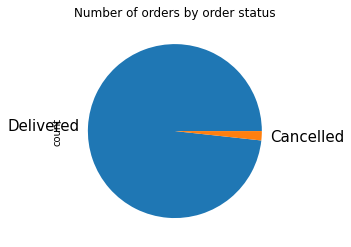

In [22]:
df.Order_Status.value_counts().plot(kind='pie', title="Number of orders by order status", fontsize=15);

### Insight:
1. **Total 9251 orders are cancelled by customers.**
2. **527390 Orders are successfuly delivered to customers.**

### 8. Find out the top 10 bese selling products by quantity?
Note: Here "StockCode" column represent unique product ID

In [23]:
product_by_quantity=pd.pivot_table(data=df, index='StockCode',
                                  values='Quantity',
                                  aggfunc=sum).sort_values(by='Quantity', ascending=False)[:10].reset_index()
product_by_quantity

,StockCode,Quantity
0,23843,80995
1,23166,78033
2,22197,56898
3,84077,54951
4,85099B,48375
5,85123A,41645
6,21212,36396
7,84879,36362
8,23084,31673
9,22492,26633


In [24]:
#function to add value labels to barplot
def value_label(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, y[i], ha='center', fontsize=15, color='white');

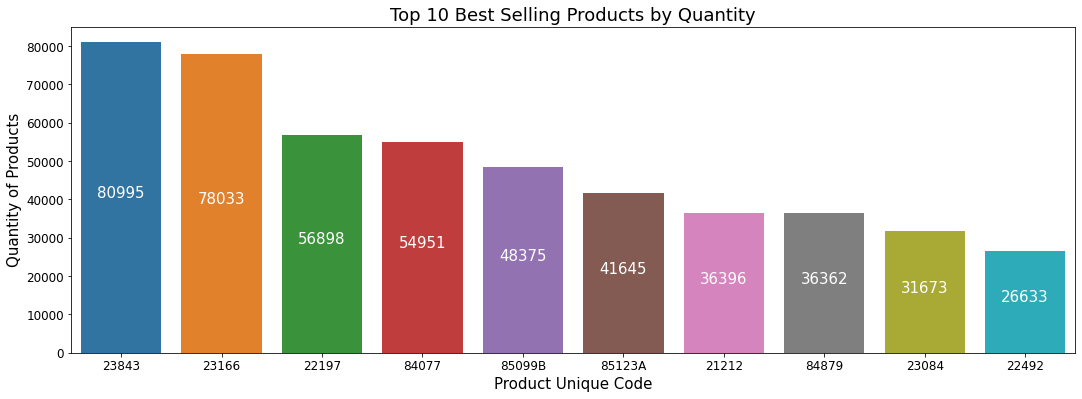

In [25]:
plt.figure(figsize=(18,6))
sns.barplot(data=product_by_quantity, x='StockCode', y='Quantity')
plt.xlabel("Product Unique Code", fontsize=15)
plt.ylabel("Quantity of Products", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 10 Best Selling Products by Quantity", fontsize=18);

index=product_by_quantity['StockCode']
values=product_by_quantity['Quantity']
value_label(index,values)

### Insights:
1. **Product with stock code "22197" sold most of the quantities.**

### 9. Create crosstab report to show those products which calncelled?

In [26]:
cancelled=df[df['Order_Status']=='Cancelled']
pd.crosstab(index=cancelled['Order_Status'], columns=cancelled['StockCode']).T.sort_values('Cancelled', ascending=False)[:10]

Order_Status,Cancelled
StockCode,
M,244
22423,180
POST,126
22960,87
D,77
22720,73
21232,60
S,60
22699,54


### Insights:
1. **Product with stock code "M" has most cancelled orders.**

### 10. What is the average quantity per order?

In [27]:
round(sum(df['Quantity']) / df['InvoiceNo'].nunique(),0)

218.0

**Average Quantity per order is 218.**

### 11. Find out that transaction which has maximum quantities ordered?

In [28]:
trans_by_quantity=pd.pivot_table(data=df, index='InvoiceNo', 
               values='Quantity',
              aggfunc=sum).sort_values(by='Quantity', ascending=False)[:10].reset_index()
trans_by_quantity

,InvoiceNo,Quantity
0,581483,80995
1,541431,74215
2,556917,15049
3,563076,14730
4,574941,14149
5,576365,13956
6,572035,13392
7,567423,12572
8,578841,12540
9,552883,12266


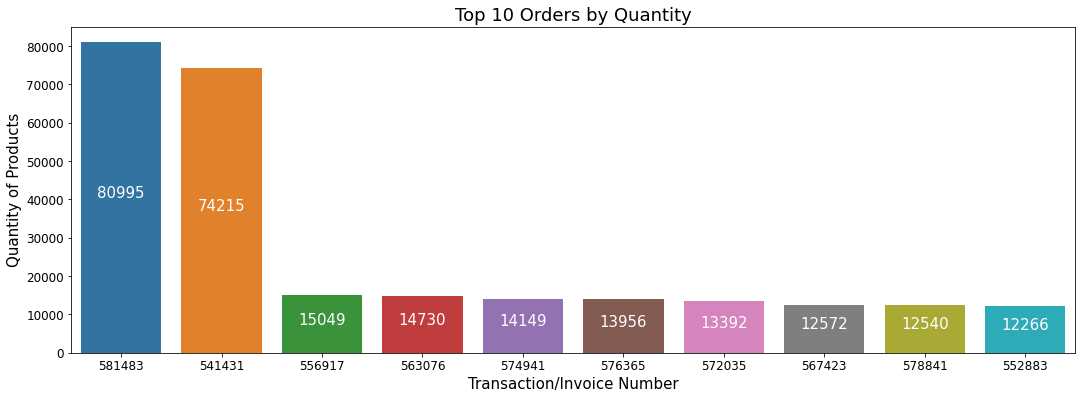

In [29]:
plt.figure(figsize=(18,6))
sns.barplot(data=trans_by_quantity, x='InvoiceNo', y='Quantity')
plt.xlabel("Transaction/Invoice Number", fontsize=15)
plt.ylabel("Quantity of Products", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 10 Orders by Quantity", fontsize=18);

index=trans_by_quantity['InvoiceNo']
values=trans_by_quantity['Quantity']
value_label(index,values)

### Insights:
1. **Transaction with Invoice Number "581483" has 80995 Quantities and invoice number "541431" has 73215 quantities ordered.**
2. **Difference in quantities ordered between first two and rest eight orders is huge.**

### 12. What is the stock code for costliest and cheapest product?

In [30]:
costly=df.groupby('StockCode').UnitPrice.max().sort_values(ascending=False)[:1]
print(f"Costliest Product have stock code '{costly.index[0]}' and Unit Price is '{costly.values[0]}'")
cheap=df.groupby('StockCode').UnitPrice.min().sort_values(ascending=True)[:1]
print(f"Cheapest Product have stock code '{cheap.index[0]}' and Unit Price is '{cheap.values[0]}'")

Costliest Product have stock code 'M' and Unit Price is '38970.0'
Cheapest Product have stock code 'B' and Unit Price is '-11062.06'


**Product with "Stock Code=B" has cheapest product among all, which costs -11062 Dollar per unit. and this is something strange because price cannot be negative. Lets find out rows which have negative unit price.**

In [31]:
df[df['StockCode']=='B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Total_Price,CustomerID,Country,Order_Status,Year,Month,Day,Week_of_year,Quarter,Week_of_month,Week_day,Hour
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,11062.06,NaN,United Kingdom,Delivered,2011,August,12,32,3,2,Friday,14
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,-11062.06,NaN,United Kingdom,Delivered,2011,August,12,32,3,2,Friday,14
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,-11062.06,NaN,United Kingdom,Delivered,2011,August,12,32,3,2,Friday,14


#### Only 2 rows which has negative Unit Price. And we have one row which give the exact price for that products with Stock code "B". Now lets replace these two rows with "11062.06". Then calculate the stock code for product having cheapest and costliest price.

In [32]:
df['UnitPrice']=df['UnitPrice'].apply(lambda x: x if x>0 else 11062.06)
df['Total_Price']=df['Total_Price'].apply(lambda x: x if x>0 else 11062.06)

In [33]:
costly=df.groupby('StockCode').UnitPrice.max().sort_values(ascending=False)[:1]
print(f"Costliest Product have stock code '{costly.index[0]}' and Unit Price is '{costly.values[0]}'")
cheap=df.groupby('StockCode').UnitPrice.min().sort_values(ascending=True)[:1]
print(f"Cheapest Product have stock code '{cheap.index[0]}' and Unit Price is '{cheap.values[0]}'")

Costliest Product have stock code 'M' and Unit Price is '38970.0'
Cheapest Product have stock code 'BANK CHARGES' and Unit Price is '0.001'


### Insights:
1. **Product with "Stock Code=M" has costliest product among all, which costs 38970 Dollar per unit.**
2. **Product with "Stock Code=BANK CHARGES" has cheapest product among all, which costs 0.001 Dollar per unit. and this is something strange because price cannot be negative. Lets find out rows which have negative unit price.**

### 13. Find out top 10 customers by most quantities ordered?

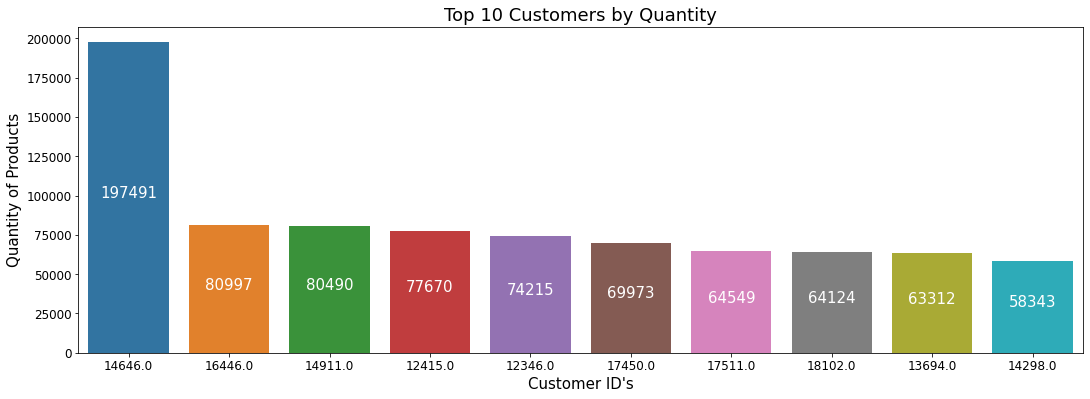

In [34]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='CustomerID', y='Quantity', estimator=sum, ci=None,
           order=df.groupby('CustomerID').Quantity.sum().sort_values(ascending=False).index[:10])
plt.xlabel("Customer ID's", fontsize=15)
plt.ylabel("Quantity of Products", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 10 Customers by Quantity", fontsize=18);

index=df.groupby('CustomerID').Quantity.sum().sort_values(ascending=False).index[:10]
values=df.groupby('CustomerID').Quantity.sum().sort_values(ascending=False).values[:10]
value_label(index,values)

### Insights:
1. **Customer having Customer ID "14646" has ordered "197491" quantities of products.**
2. **Customer having "16446" Customer ID ordered "80997" quantities of products. We can see the difference between first and second customer who purchases most quantities.**

### 14. Find top 5 trnasactions having maximum spending?

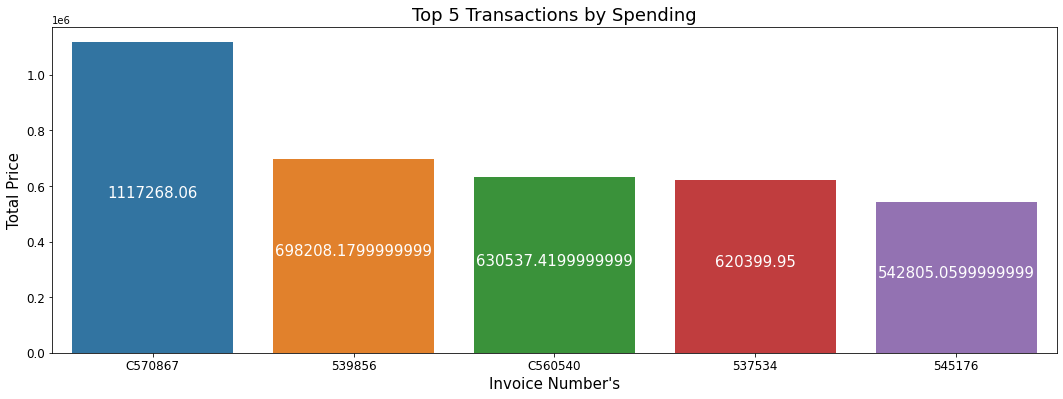

In [35]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='InvoiceNo', y='Total_Price', estimator=sum, ci=None,
           order=df.groupby('InvoiceNo').Total_Price.sum().sort_values(ascending=False).index[:5])
plt.xlabel("Invoice Number's", fontsize=15)
plt.ylabel("Total Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 5 Transactions by Spending", fontsize=18);

index=df.groupby('InvoiceNo').Total_Price.sum().sort_values(ascending=False).index[:5]
values=df.groupby('InvoiceNo').Total_Price.sum().sort_values(ascending=False).values[:5]
value_label(index,values)

### Insights:
1. **Maximum Bill amount is 1,68,459.6 Dollar for transaction ID 581483.**
2. **Seconfd highest bill amount is 77,183.6 Dollar for trnsaction ID 541431.**

### 15. Top 10 customers by total spending?

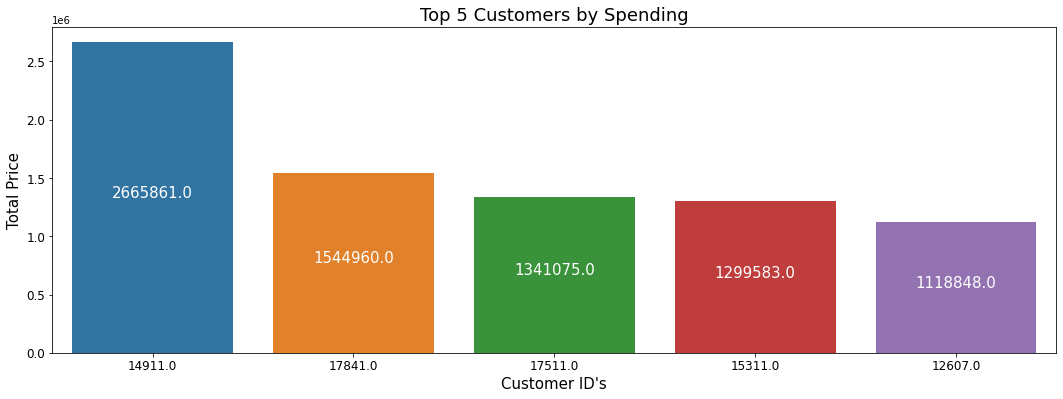

In [36]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='CustomerID', y='Total_Price', estimator=sum, ci=None,
           order=df.groupby('CustomerID').Total_Price.sum().sort_values(ascending=False).index[:5])
plt.xlabel("Customer ID's", fontsize=15)
plt.ylabel("Total Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 5 Customers by Spending", fontsize=18);

index=df.groupby('CustomerID').Total_Price.sum().sort_values(ascending=False).index[:5]
values=df.groupby('CustomerID').Total_Price.sum().sort_values(ascending=False).values[:5].round(0)
value_label(index,values)

### Insights:
1. **Customer having Customer ID 14911 spends almost 2.66 Million Dollar**

### 16. Top 10 and bottom 10 Country by Quantity?

In [37]:
#function to add value labels to barplot
def value_label(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', fontsize=15, color='black');

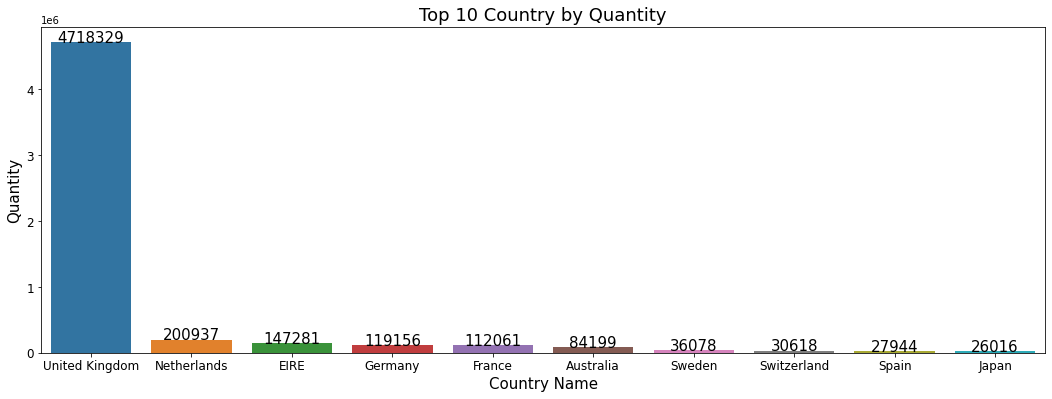

In [38]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='Country', y='Quantity', estimator=sum, ci=None,
           order=df.groupby('Country').Quantity.sum().sort_values(ascending=False).index[:10])
plt.xlabel("Country Name", fontsize=15)
plt.ylabel("Quantity", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 10 Country by Quantity", fontsize=18);

index=df.groupby('Country').Quantity.sum().sort_values(ascending=False).index[:10]
values=df.groupby('Country').Quantity.sum().sort_values(ascending=False).values[:10].round(0)
value_label(index,values)

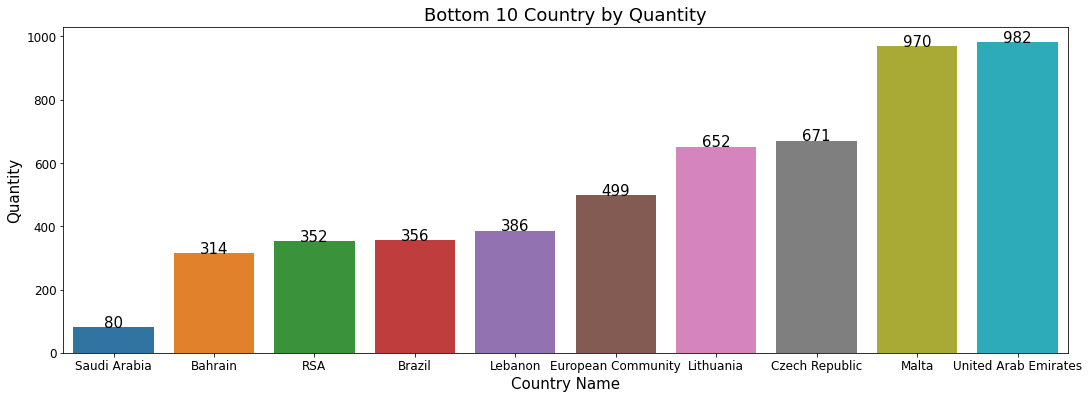

In [39]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='Country', y='Quantity', estimator=sum, ci=None,
           order=df.groupby('Country').Quantity.sum().sort_values(ascending=True).index[:10])
plt.xlabel("Country Name", fontsize=15)
plt.ylabel("Quantity", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bottom 10 Country by Quantity", fontsize=18);

index=df.groupby('Country').Quantity.sum().sort_values(ascending=True).index[:10]
values=df.groupby('Country').Quantity.sum().sort_values(ascending=True).values[:10].round(0)
value_label(index,values)

### Insights:
1. **United Kingdom Customers ordered 4.178 M Quantities of products.**
2. **On second position we have Netherlands with 200 K Quantities.**
3. **Suadi Arabia Costomers purchased just 80 qunatities.**

### 17. Top 10 and bottom 10 countries by total sales?

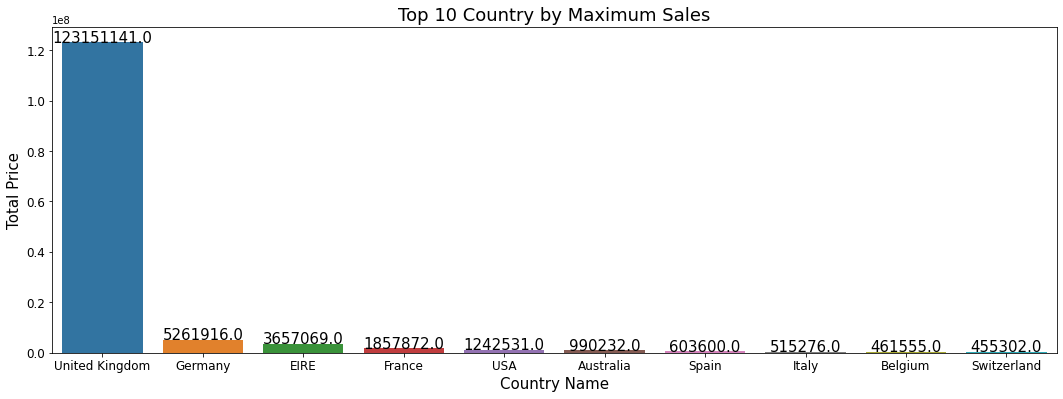

In [40]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='Country', y='Total_Price', estimator=sum, ci=None,
           order=df.groupby('Country').Total_Price.sum().sort_values(ascending=False).index[:10])
plt.xlabel("Country Name", fontsize=15)
plt.ylabel("Total Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Top 10 Country by Maximum Sales", fontsize=18);

index=df.groupby('Country').Total_Price.sum().sort_values(ascending=False).index[:10]
values=df.groupby('Country').Total_Price.sum().sort_values(ascending=False).values[:10].round(0)
value_label(index,values)

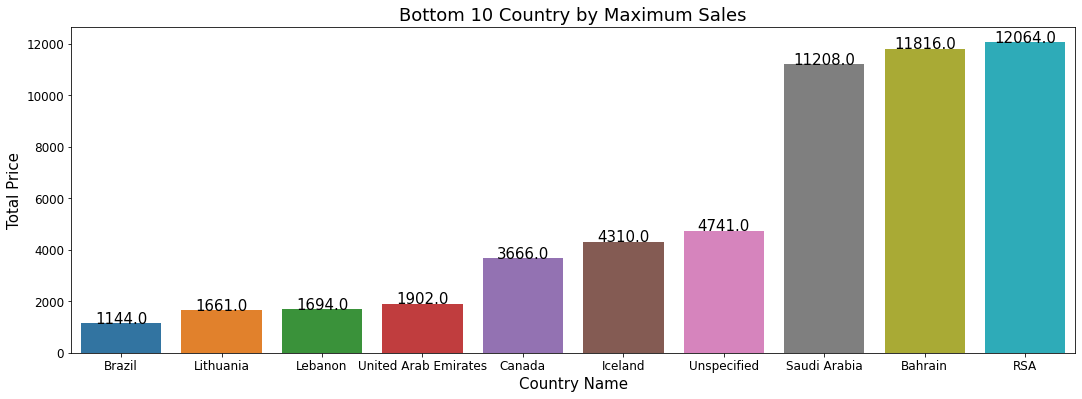

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='Country', y='Total_Price', estimator=sum, ci=None,
           order=df.groupby('Country').Total_Price.sum().sort_values(ascending=True).index[:10])
plt.xlabel("Country Name", fontsize=15)
plt.ylabel("Total Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bottom 10 Country by Maximum Sales", fontsize=18);

index=df.groupby('Country').Total_Price.sum().sort_values(ascending=True).index[:10]
values=df.groupby('Country').Total_Price.sum().sort_values(ascending=True).values[:10].round(0)
value_label(index,values)

### Insights:
1. **United Kingdom has maximum sales of 123.151 Million Dollar. Second highest Sales happening in Germany 5.26 Million.**
2. **Least sales in the country Brazil which is having business of 1144 Dollar.**

### 18. Which country customers often cancels the order?

In [42]:
canceled_df=df[df['Order_Status']=='Cancelled']
pd.crosstab(index=canceled_df['Order_Status'], columns=canceled_df['Country']).T.sort_values(ascending=False, by='Cancelled')[:5]

Order_Status,Cancelled
Country,
United Kingdom,7821
Germany,453
EIRE,301
France,148
USA,112


In [43]:
pd.crosstab(index=canceled_df['Order_Status'], columns=canceled_df['Country']).T.sort_values(by='Cancelled')[:5]

Order_Status,Cancelled
Country,
Saudi Arabia,1
Bahrain,1
Greece,1
European Community,1
Israel,2


### Insights:
1. **In united kingdom most orders are placed hence there are high chances that the orders from this country has most canceled orders.**
2. **Least orders cancelled in Suadi Arabia.**

### 19. Top 10 Most sold product?

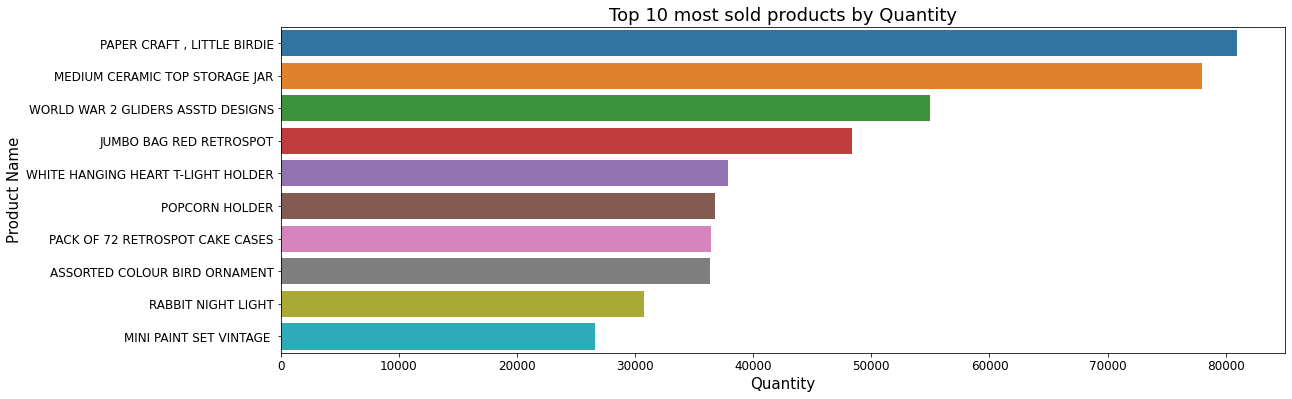

In [44]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, y='Description', x='Quantity', estimator=sum, ci=None,
           order=df.groupby('Description').Quantity.sum().sort_values(ascending=False).index[:10])
plt.ylabel("Product Name", fontsize=15)
plt.xlabel("Quantity", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Top 10 most sold products by Quantity", fontsize=18);

#### Paper Craft, Little Birdie product sold most of its quantities.

### Top 10 products by revenue?

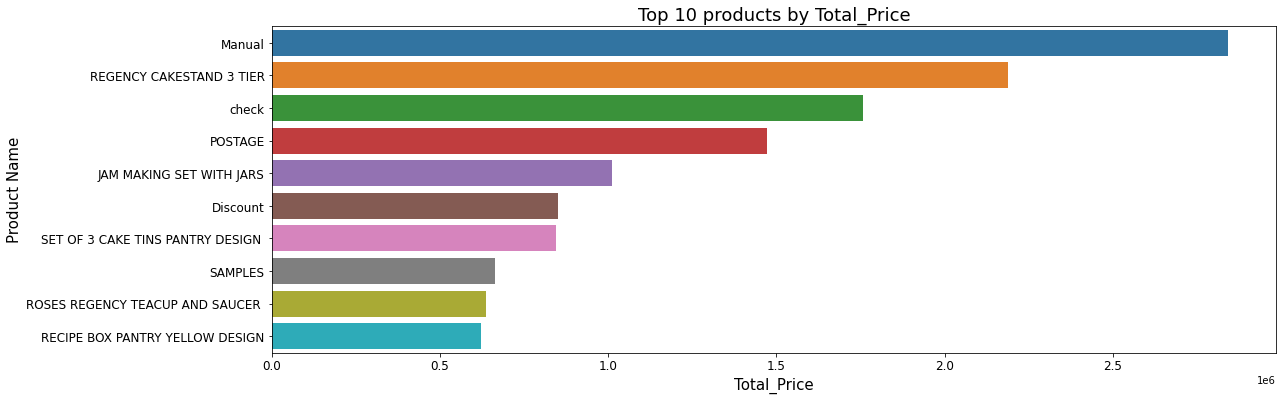

In [45]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, y='Description', x='Total_Price', estimator=sum, ci=None,
           order=df.groupby('Description').Total_Price.sum().sort_values(ascending=False).index[:10])
plt.ylabel("Product Name", fontsize=15)
plt.xlabel("Total_Price", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Top 10 products by Total_Price", fontsize=18);

#### Product having name "Manual" has highest revenue.

### 19. Quantities Ordered by Year, Month, Day, Week of Year, Week of month, week day, quarter and time

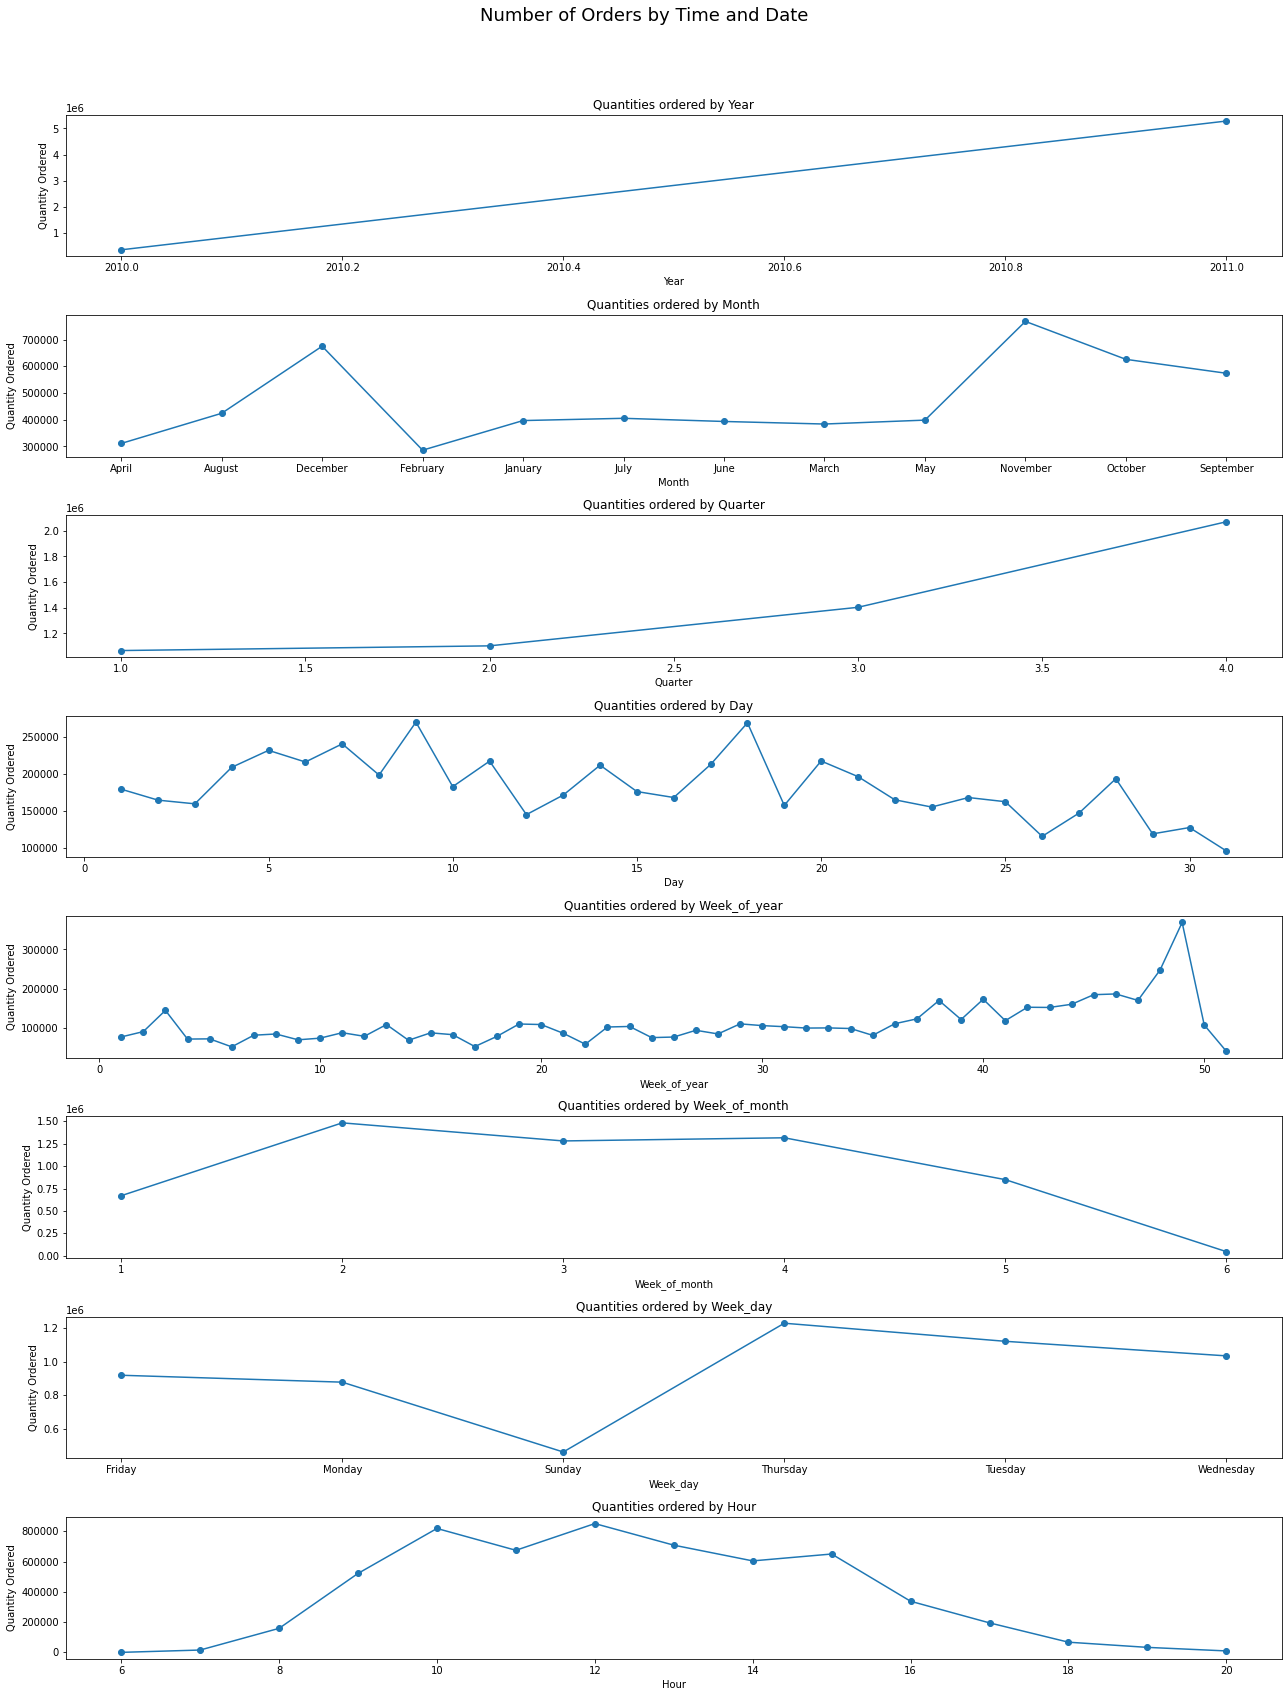

In [67]:
datetime_columns=['Year','Month','Quarter','Day','Week_of_year','Week_of_month','Week_day','Hour']
fig, axes = plt.subplots(nrows=len(datetime_columns), figsize=(18, 24))
fig.suptitle('Number of Orders by Time and Date', fontsize=18)
for i, column in enumerate(datetime_columns):
    order=df.groupby(column).Quantity.sum()
    ax=axes[i]
    ax.plot(order.index, order.values, marker='o', linestyle='-')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Quantity Ordered')
    ax.set_title(f'Quantities ordered by {column.capitalize()}')
plt.tight_layout(rect=[0, 0, 1, 0.95])

<Figure size 432x288 with 0 Axes>

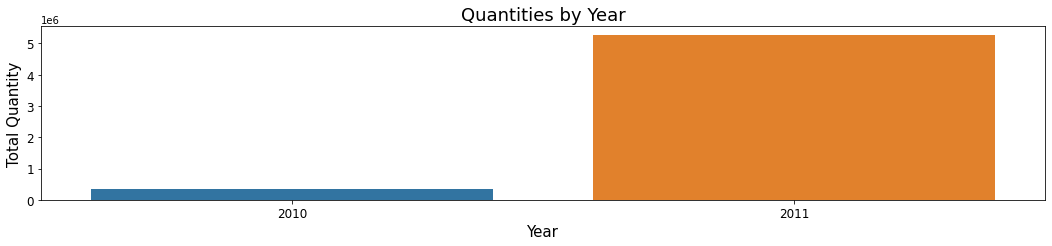

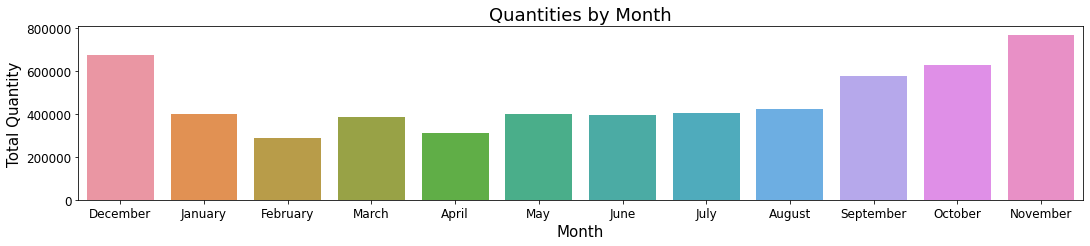

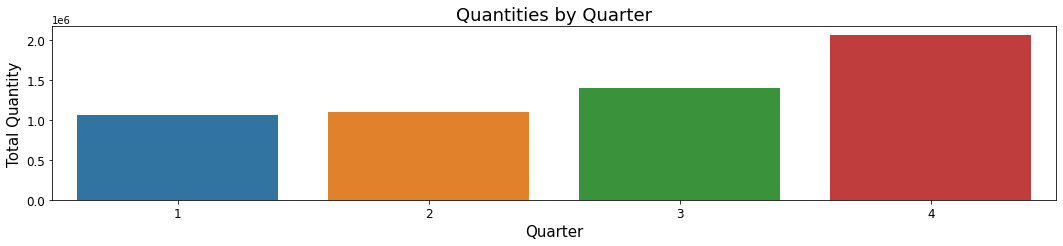

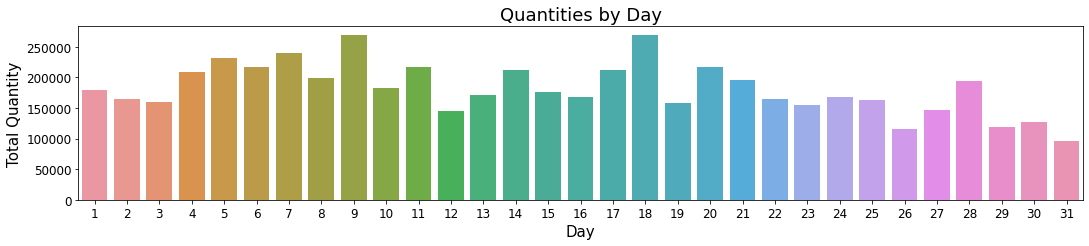

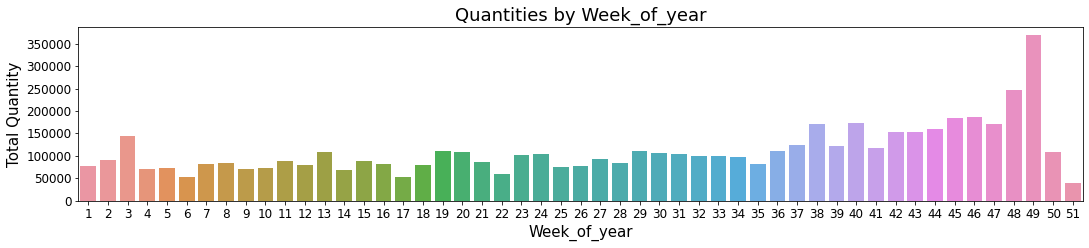

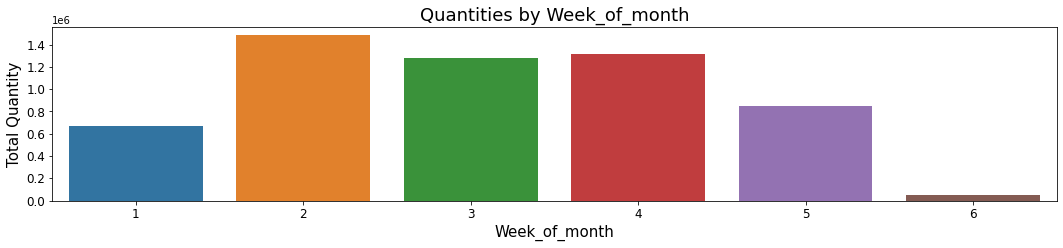

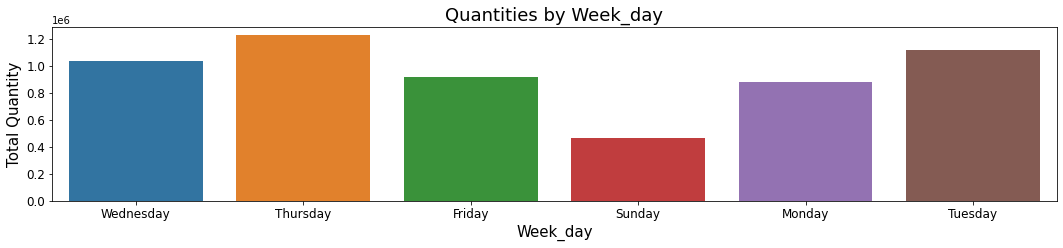

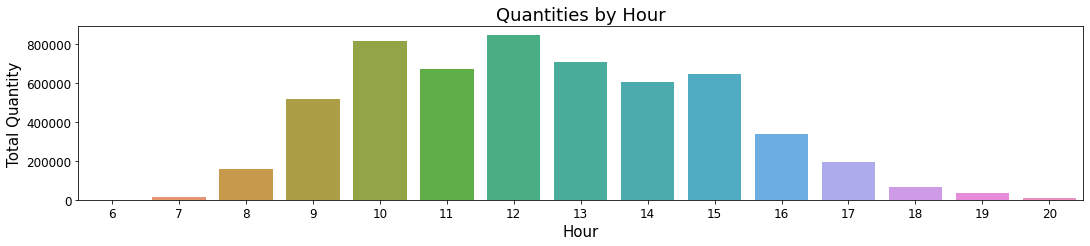

In [83]:
datetime_columns=['Year','Month','Quarter','Day','Week_of_year','Week_of_month','Week_day','Hour']
plt.suptitle("Quantities by Date and Time", fontsize=22, color='red')
for i, column in enumerate(datetime_columns):
    plt.figure(figsize=(18,30))
    plt.subplot(8,1,i+1)
    sns.barplot(x=df[column], y=df['Quantity'], estimator=sum, ci=None);
    plt.xlabel(f"{column.capitalize()}", fontsize=15)
    plt.ylabel("Total Quantity", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"Quantities by {column.capitalize()}", fontsize=18)

### Insights:
1. **In the month of november most quantities of product order been placed. Second highest quantities ordered in month of december.**
2. **In the forth quarter of year most quantities been ordered.**
3. **On the 9th and 18 th day of the month most quantities has been ordered evey month.**
4. **In the 49th week of the year maximum quantities has been ordered, this is due to christmas festival.**
5. **On the second week of the month most quantities has been ordered.**
6. **Most quantities ordered on Thursday and then on Tuesday.**
7. **Most quantities are ordered at 12 PM Noon.**

### 20. Rebenue by Year, Month, Day, Week of Year, Week of month, week day, quarter and time

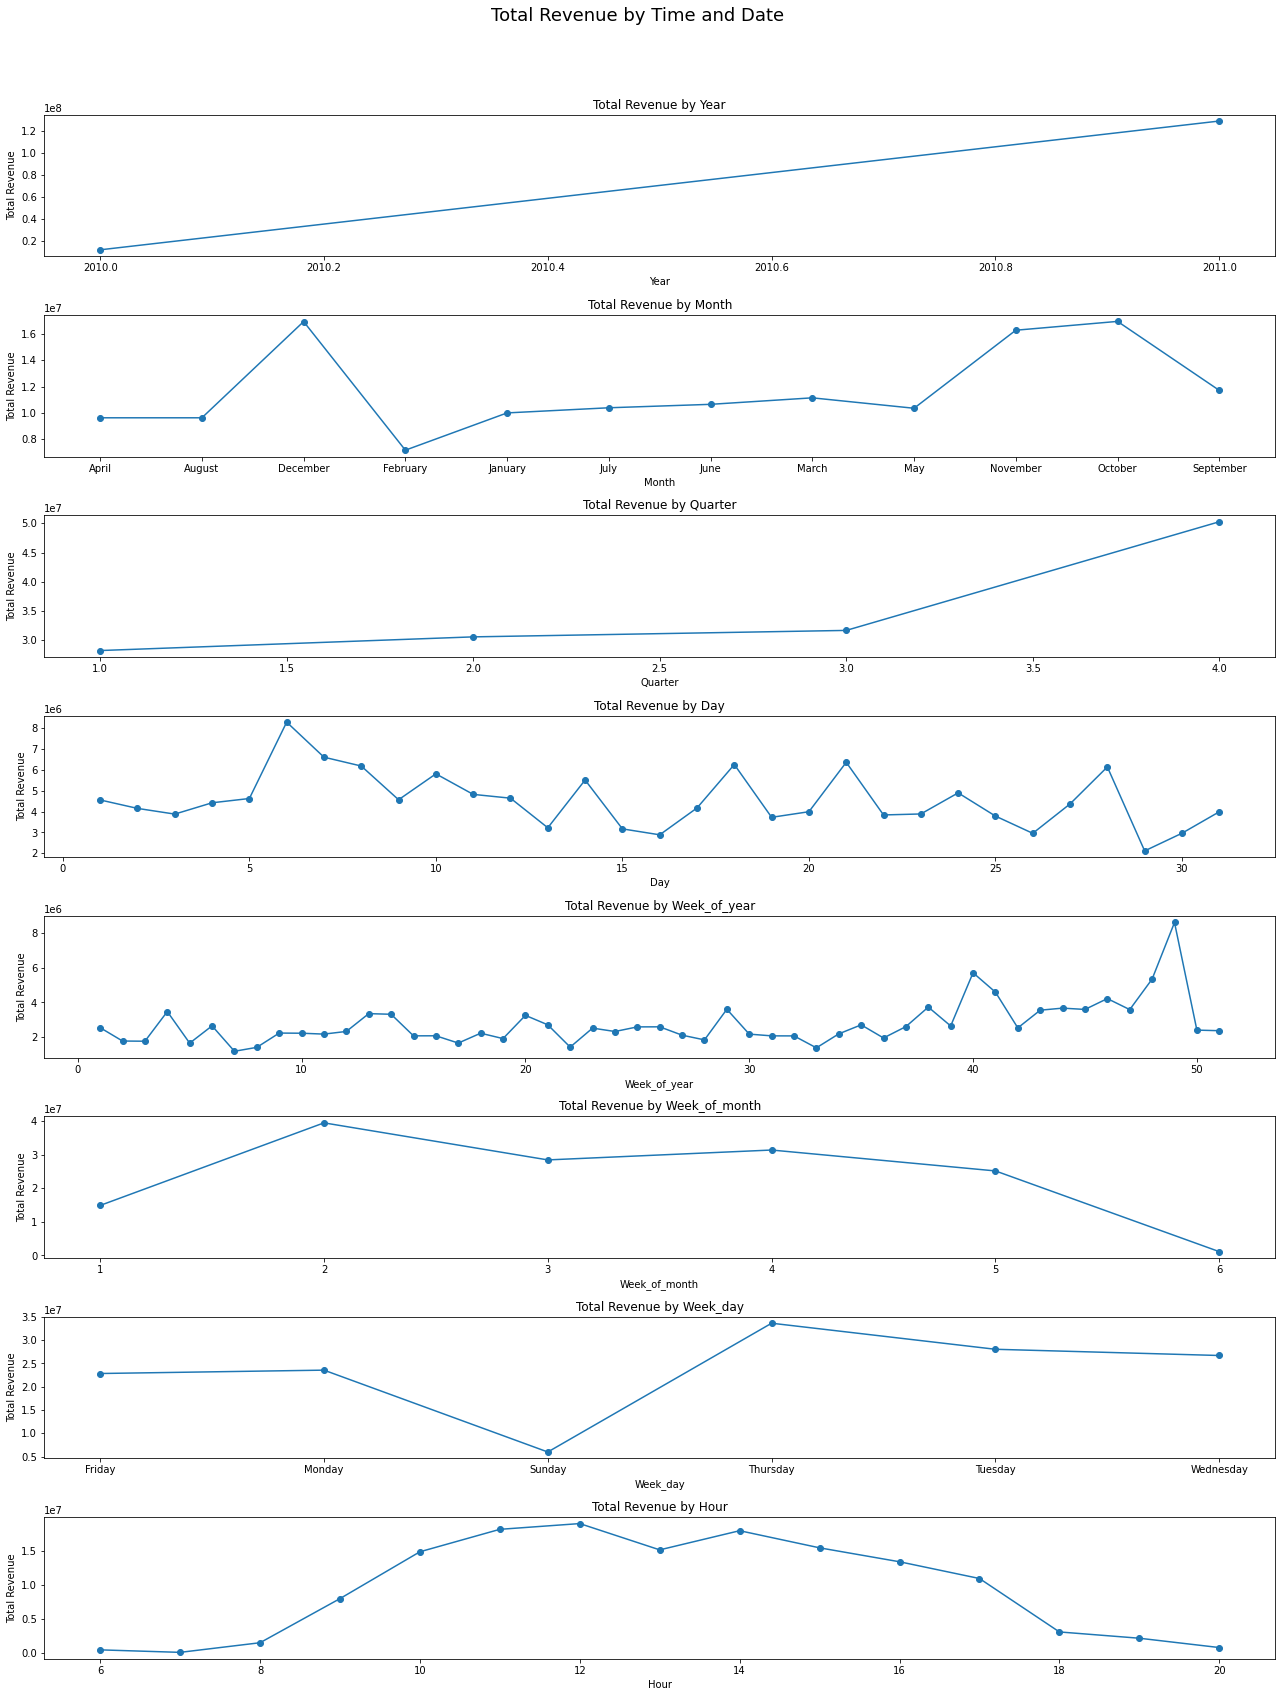

In [85]:
datetime_columns=['Year','Month','Quarter','Day','Week_of_year','Week_of_month','Week_day','Hour']
fig, axes = plt.subplots(nrows=len(datetime_columns), figsize=(18, 24))
fig.suptitle('Total Revenue by Time and Date', fontsize=18)
for i, column in enumerate(datetime_columns):
    revenue=df.groupby(column).Total_Price.sum()
    ax=axes[i]
    ax.plot(revenue.index, revenue.values, marker='o', linestyle='-')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Total Revenue')
    ax.set_title(f'Total Revenue by {column.capitalize()}')
plt.tight_layout(rect=[0, 0, 1, 0.95])

### Insights:
1. **In the month of december,octomer and november has maximum sales.**
2. **In the forth quarter of year sales is maximum.**
3. **On the 6th day of the month the revenue colletion is high.**
4. **In the 49th week of the year maximum maximum reveue is collected.**
5. **On the second week of the month the revenue collection is maximum.**
6. **Maximum sales is on Thursday and then on Tuesday.**
7. **Highest revenue collected at 12 PM Noon. Then at 11 AM and then at 2 PM.**